<a href="https://colab.research.google.com/github/chrishg23-jpg/HES-benchmark/blob/main/PerturbationHES001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

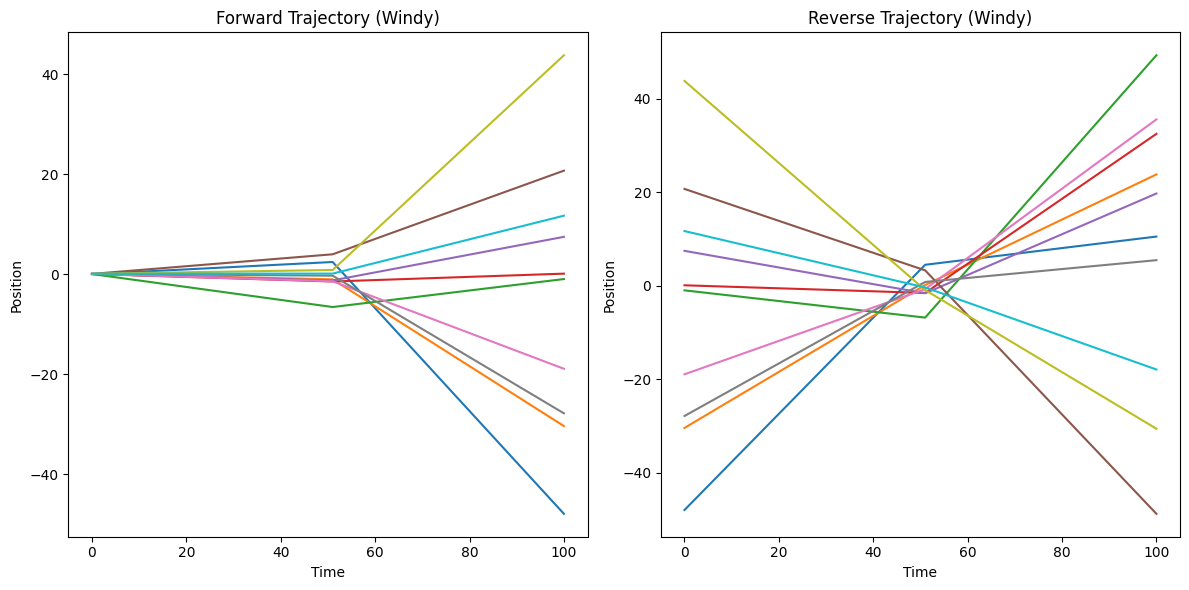

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulation parameters
N = 100             # Number of particles
T = 100             # Total timesteps
perturb_t = 50      # When to inject perturbation
noise_strength = 0.5  # Magnitude of perturbation

# Initialize positions and velocities
x0 = np.linspace(0, 1, N)
v0 = np.random.randn(N) * 0.1

def evolve(x, v, steps, perturb=False):
    trajectory = [x.copy()]
    for t in range(steps):
        x += v
        if perturb and t == perturb_t:
            v += np.random.randn(N) * noise_strength  # Inject "wind"
        trajectory.append(x.copy())
    return np.array(trajectory)

# Forward evolution (with perturbation)
x_fwd = x0.copy()
v_fwd = v0.copy()
traj_fwd = evolve(x_fwd, v_fwd, T, perturb=True)

# Reverse evolution (same initial state, reversed velocities)
x_rev = traj_fwd[-1].copy()
v_rev = -v_fwd.copy()
traj_rev = evolve(x_rev, v_rev, T, perturb=True)

# Entropy proxy: velocity dispersion
def entropy(v):
    return np.std(v)

entropy_fwd = [entropy(v_fwd)]
entropy_rev = [entropy(v_rev)]

# Plot trajectories
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Forward Trajectory (Windy)")
plt.plot(traj_fwd[:, :10])  # Plot first 10 particles
plt.xlabel("Time")
plt.ylabel("Position")

plt.subplot(1, 2, 2)
plt.title("Reverse Trajectory (Windy)")
plt.plot(traj_rev[:, :10])
plt.xlabel("Time")
plt.ylabel("Position")
plt.tight_layout()
plt.show()
